Drug Classification

**Problem Statment:** The problem statement for this project is to accurately classify patients into the appropriate drug category based on their medical information.

**Objective:** The goal is to create a machine-learning model reliable for classification. Based on the patient's features, the model should be able to forecast the sort of drug that will be most beneficial for them.

1. Data Collection and Pre-Processing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/P19 Develop an MLModel for Drug Classification and Deployment of the Model/drug200.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
data.shape

(200, 6)

In [ ]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
data.dtypes

,0
Age,int64
Sex,object
BP,object
Cholesterol,object
Na_to_K,float64
Drug,object


In [ ]:
data.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
data['Sex'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
data['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [ ]:
data['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [ ]:
data['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

{'whiskers': [<matplotlib.lines.Line2D at 0x7be9a28e9050>,
 'caps': [<matplotlib.lines.Line2D at 0x7be9a28e7f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7be9a2919d10>],
 'medians': [<matplotlib.lines.Line2D at 0x7be9a28e6290>],
 'fliers': [<matplotlib.lines.Line2D at 0x7be9a28e5750>],
 'means': []}

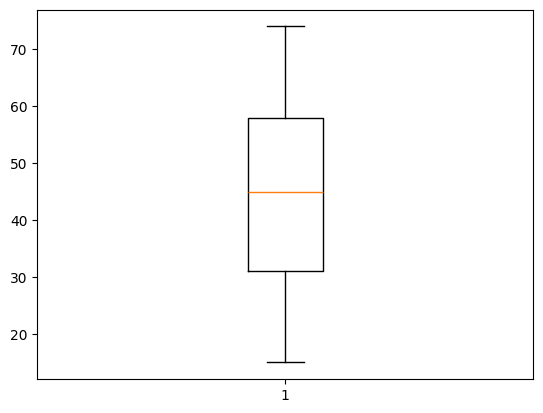

In [ ]:
plt.boxplot(data['Age'])

The box plot depicts data with a median of ~45 and interquartile range of ~32-58.
The overall distribution spans from ~15 to ~75, showing moderate spread without outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x7be9a2a601d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7be9a2a631d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7be9a28cbb10>],
 'medians': [<matplotlib.lines.Line2D at 0x7be9a2902bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7be9a2903750>],
 'means': []}

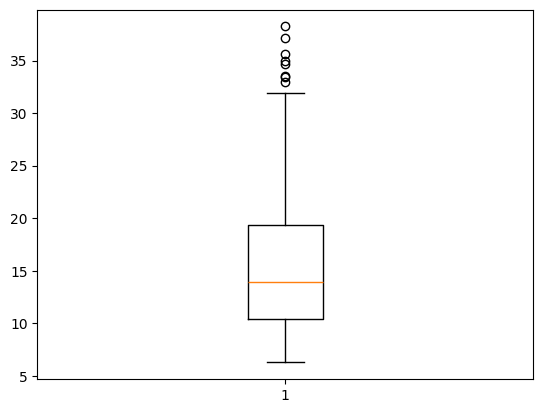

In [ ]:
plt.boxplot(data['Na_to_K'])

This box plot shows a right-skewed distribution with median ~14 and IQR spanning from ~10 to ~19.
Several outliers appear above the upper whisker (at ~32), indicating unusual high values in the dataset.
The main distribution ranges from ~6 to ~32, with most values concentrated in the lower portion.

In [ ]:
#Remove outlier from Na_to_K
q1=data['Na_to_K'].quantile(0.25)
q3=data['Na_to_K'].quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR

#detect outliers
outliers=data[(data['Na_to_K']<lower_bound) | (data['Na_to_K']>upper_bound)]
outlier_count = outliers.shape[0]
print(f"Total Outliers: {outlier_count}")

Total Outliers: 8


In [ ]:
#cliping outliers
data['Na_to_K']=data['Na_to_K'].clip(lower_bound,upper_bound)

{'whiskers': [<matplotlib.lines.Line2D at 0x7be9a041d6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7be9a041ee10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7be9a041cad0>],
 'medians': [<matplotlib.lines.Line2D at 0x7be9a0424490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7be9a0425050>],
 'means': []}

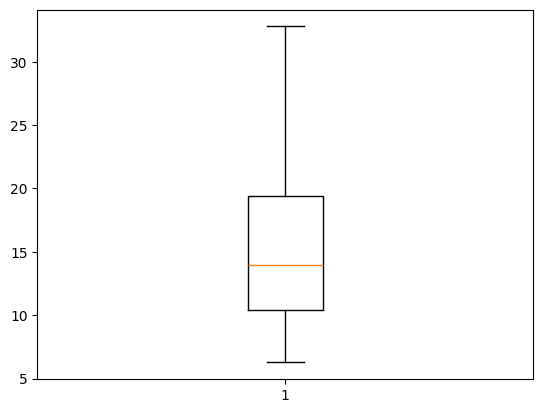

In [ ]:
plt.boxplot(data['Na_to_K'])

In [ ]:
data.dtypes

,0
Age,int64
Sex,object
BP,object
Cholesterol,object
Na_to_K,float64
Drug,object


2. Data Exploration

In [ ]:
print(data['Sex'].value_counts())
print(data['BP'].value_counts())
print(data['Cholesterol'].value_counts())
print(data['Drug'].value_counts())

Sex
M    104
F     96
Name: count, dtype: int64
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64
Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


<ipython-input-22-94f347310375>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=data, palette='viridis')


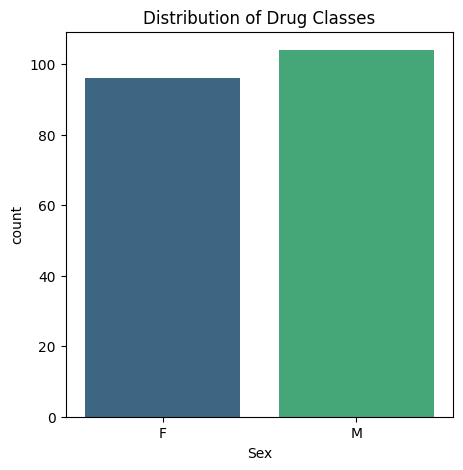

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Sex', data=data, palette='viridis')
plt.title("Distribution of Drug Classes")
plt.show()

<ipython-input-23-e37a96939c7e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BP', data=data, palette='viridis')


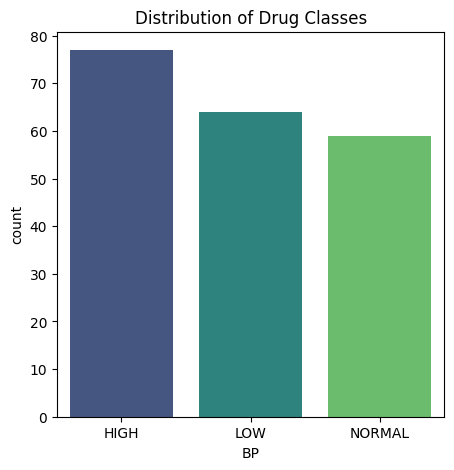

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x='BP', data=data, palette='viridis')
plt.title("Distribution of Drug Classes")
plt.show()

<ipython-input-24-99b7d142714d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cholesterol', data=data, palette='viridis')


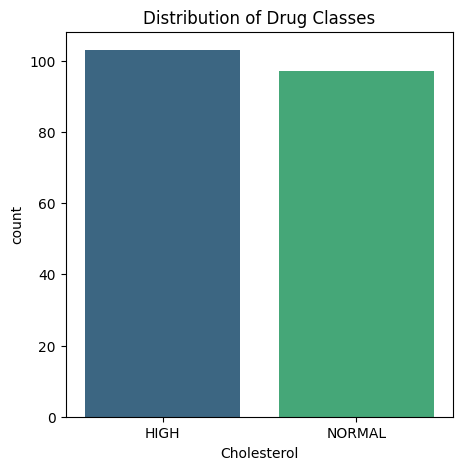

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='Cholesterol', data=data, palette='viridis')
plt.title("Distribution of Drug Classes")
plt.show()

<ipython-input-25-c9aa8910fd58>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drug', data=data, palette='viridis')


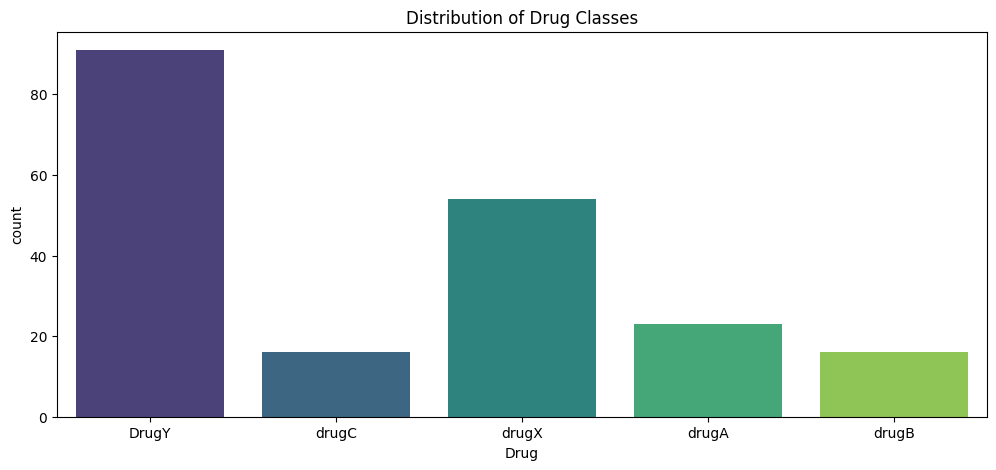

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Drug', data=data, palette='viridis')
plt.title("Distribution of Drug Classes")
plt.show()

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Drug']=le.fit_transform(data['Drug'])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
data['Sex']=ohe.fit_transform(data[['Sex']]).toarray()
data['BP']=ohe.fit_transform(data[['BP']]).toarray()
data['Cholesterol']=ohe.fit_transform(data[['Cholesterol']]).toarray()

In [ ]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1.0,1.0,1.0,25.355,0
1,47,0.0,0.0,1.0,13.093,3
2,47,0.0,0.0,1.0,10.114,3
3,28,1.0,0.0,1.0,7.798,4
4,61,1.0,0.0,1.0,18.043,0


In [ ]:
data.shape

(200, 6)

In [ ]:
data.dtypes

,0
Age,int64
Sex,float64
BP,float64
Cholesterol,float64
Na_to_K,float64
Drug,int64


In [ ]:
data = data.reset_index(drop=True)

In [ ]:
#standardize the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data['Age']=sc.fit_transform(data[['Age']])
data['Na_to_K']=sc.fit_transform(data[['Na_to_K']])

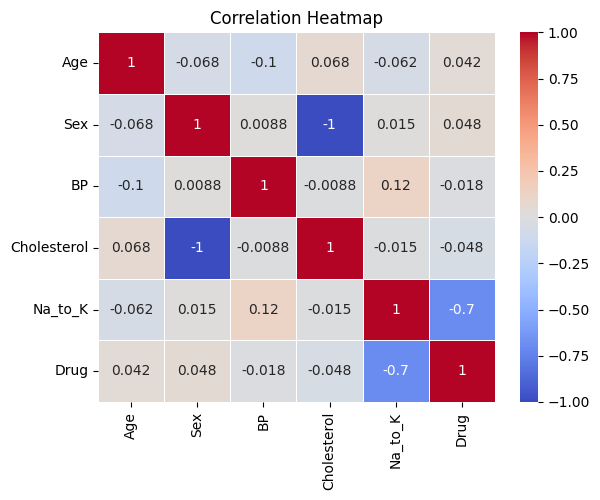

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

3. Feature Selection

In [ ]:
#Feature selection using Ftest
from sklearn.feature_selection import f_classif

X = data.drop(columns=['Drug'])  # Independent variables
y = data['Drug']  # Target variable

# Compute ANOVA F-values
f_values, p_values = f_classif(X, y)

# Convert results to a DataFrame
feature_importance = pd.DataFrame({'Feature': X.columns, 'F-value': f_values, 'p-value': p_values})
print(feature_importance.sort_values(by='F-value', ascending=False))

       Feature    F-value       p-value
4      Na_to_K  93.980239  2.120577e-44
2           BP  55.559145  3.272003e-31
0          Age   7.210544  1.956098e-05
3  Cholesterol   5.299457  4.508400e-04
1          Sex   0.522099  7.195941e-01


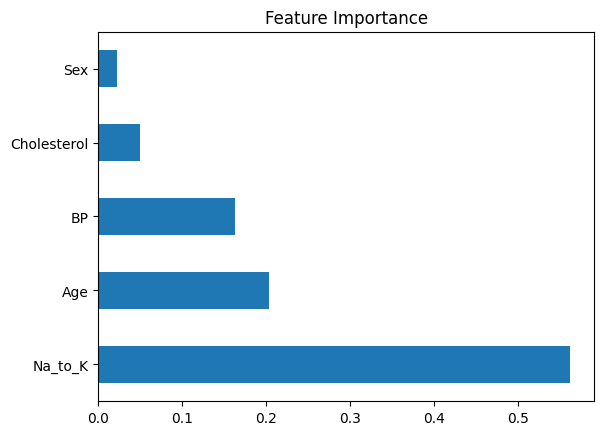

In [ ]:
#Feature selection using Ml treeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Train a model to get feature importance
model = ExtraTreesClassifier()
model.fit(X, y)

# Plot feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(5).plot(kind='barh')
plt.title("Feature Importance")
plt.show()

In [ ]:
#standardize the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data['Age']=sc.fit_transform(data[['Age']])
data['Na_to_K']=sc.fit_transform(data[['Na_to_K']])

4. Model Selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
X=data.drop(columns=['Drug'])
y=data['Drug']

x1,x2,y1,y2=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
#Logistic Regression
log_reg=LogisticRegression()
log_reg.fit(x1,y1)
y_pre=log_reg.predict(x2)

print("Logistic Regression Accuracy:",accuracy_score(y2,y_pre))

Logistic Regression Accuracy: 0.8833333333333333


In [ ]:
#Random Forest
rf=RandomForestClassifier()
rf.fit(x1,y1)
y_pre_rf=rf.predict(x2)

print("Random Forest Accuracy: ",accuracy_score(y2,y_pre_rf))


Random Forest Accuracy:  0.9


In [ ]:
#XGBoost
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(x1,y1)
y_pred_xgb = xgb_model.predict(x2)
xgb_accuracy = accuracy_score(y2, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

XGBoost Accuracy: 0.9000


In [ ]:
#Decision Tree
dt=DecisionTreeClassifier()
dt.fit(x1,y1)
y_pre_dt=dt.predict(x2)

print("Decision Tree accuracy: ",accuracy_score(y2,y_pred_xgb))

Decision Tree accuracy:  0.9


In [ ]:
#svm
svm=SVC()
svm.fit(x1,y1)
y_pre_svm=svm.predict(x2)

print("Svm Accuracy: ",accuracy_score(y2,y_pre_dt))

Svm Accuracy:  0.9166666666666666


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x1,y1)
y_pre_knn=knn.predict(x2)

print("Knn Accuracy: ",accuracy_score(y2,y_pre))

Knn Accuracy:  0.8833333333333333


5. Model Optimization

In [ ]:
#Grid search for Hyperparameter
from sklearn.model_selection import GridSearchCV